In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [3]:
df.head() 
# 4차원 데이터

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # 피쳐 분리
y = df.loc[:, ['target']].values # 타겟 분리
x = StandardScaler().fit_transform(x) # 표준화

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 4차원에서 2차원
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data= principalComponents, columns=['principalComponents1', 'principalComponents2'])

In [7]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

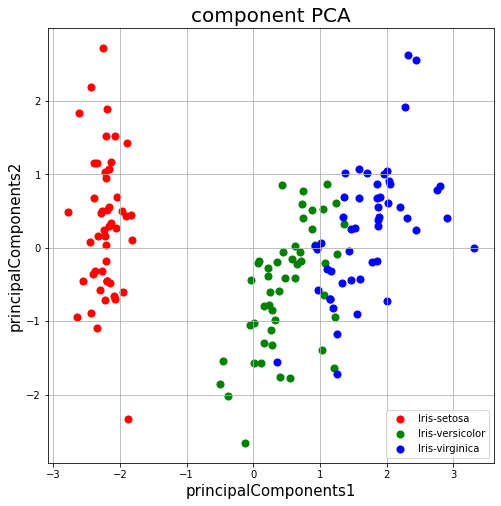

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principalComponents1', fontsize = 15)
ax.set_ylabel('principalComponents2', fontsize = 15)
ax.set_title('component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principalComponents1'],
              finalDf.loc[indicesToKeep, 'principalComponents2'],
              c = color, s = 50)
ax.legend(targets)
ax.grid()

# 2차원으로 변경하여 시각화 용이
